# EventVestor: Buyback Authorizations

In this notebook, we'll take a look at EventVestor's *Buyback Authorizations* dataset, available on the [Quantopian Store](https://www.quantopian.com/store). This dataset spans January 01, 2007 through the current day.

## Notebook Contents

There are two ways to access the data and you'll find both of them listed below. Just click on the section you'd like to read through.

- <a href='#interactive'><strong>Interactive overview</strong></a>: This is only available on Research and uses blaze to give you access to large amounts of data. Recommended for exploration and plotting.
- <a href='#pipeline'><strong>Pipeline overview</strong></a>: Data is made available through pipeline which is available on both the Research & Backtesting environment. Recommended for custom factor development and moving back & forth between research/backtesting.

### Free samples and limits
One key caveat: we limit the number of results returned from any given expression to 10,000 to protect against runaway memory usage. To be clear, you have access to all the data server side. We are limiting the size of the responses back from Blaze.

There is a *free* version of this dataset as well as a paid one. The free sample includes data until 2 months prior to the current date.

To access the most up-to-date values for this data set for trading a live algorithm (as with other partner sets), you need to purchase acess to the full set.

With preamble in place, let's get started:

<a id='interactive'></a>
#Interactive Overview
### Accessing the data with Blaze and Interactive on Research
Partner datasets are available on Quantopian Research through an API service known as [Blaze](http://blaze.pydata.org). Blaze provides the Quantopian user with a convenient interface to access very large datasets, in an interactive, generic manner.

Blaze provides an important function for accessing these datasets. Some of these sets are many millions of records. Bringing that data directly into Quantopian Research directly just is not viable. So Blaze allows us to provide a simple querying interface and shift the burden over to the server side.

It is common to use Blaze to reduce your dataset in size, convert it over to Pandas and then to use Pandas for further computation, manipulation and visualization.

Helpful links:
* [Query building for Blaze](http://blaze.readthedocs.io/en/latest/queries.html)
* [Pandas-to-Blaze dictionary](http://blaze.readthedocs.io/en/latest/rosetta-pandas.html)
* [SQL-to-Blaze dictionary](http://blaze.readthedocs.io/en/latest/rosetta-sql.html).

Once you've limited the size of your Blaze object, you can convert it to a Pandas DataFrames using:
> `from odo import odo`  
> `odo(expr, pandas.DataFrame)`


###To see how this data can be used in your algorithm, search for the `Pipeline Overview` section of this notebook or head straight to <a href='#pipeline'>Pipeline Overview</a>

In [19]:
# import the dataset
from quantopian.interactive.data.eventvestor import buyback_auth as dataset

# or if you want to import the free dataset, use:
#from quantopian.data.eventvestor import buyback_auth_free

# import data operations
from odo import odo
# import other libraries we will use
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Let's use blaze to understand the data a bit using Blaze dshape()
dataset.dshape

dshape("""var * {
  event_id: float64,
  trade_date: ?datetime,
  symbol: string,
  event_type: ?string,
  event_headline: ?string,
  buyback_type: ?string,
  buyback_purpose: ?string,
  offer_type: ?string,
  buyback_amount: float64,
  buyback_units: ?string,
  event_rating: float64,
  sid: int64,
  asof_date: datetime,
  timestamp: datetime
  }""")

In [3]:
# And how many rows are there?
# N.B. we're using a Blaze function to do this, not len()
dataset.count()

8894

In [4]:
# Let's see what the data looks like. We'll grab the first three rows.
dataset[:3]

,event_id,trade_date,symbol,event_type,event_headline,buyback_type,buyback_purpose,offer_type,buyback_amount,buyback_units,event_rating,sid,asof_date,timestamp
0,199282,2007-01-05,IIIN,Buyback,Insteel Industries Announces $25M Share Buyback,New,General Corporate,Open Market,25.0,$M,1,3849,2007-01-05,2007-01-06
1,131132,2007-01-12,COP,Buyback,ConocoPhillips Announces $1B Share Repurchase ...,New,General Corporate,Open Market,1000.0,$M,1,23998,2007-01-12,2007-01-13
2,150579,2007-01-17,VLY,Buyback,Valley National Bancorp Announces 3.5M Share R...,New,General Corporate,Open Market,3.5,Mshares,1,8011,2007-01-17,2007-01-18


Let's go over the columns:
- **event_id**: the unique identifier for this buyback authorization.
- **asof_date**: EventVestor's timestamp of event capture.
- **trade_date**: for event announcements made before trading ends, trade_date is the same as event_date. For announcements issued after market close, trade_date is next market open day.
- **symbol**: stock ticker symbol of the affected company.
- **event_type**: this should always be *Buyback*.
- **event_headline**: a short description of the event.
- **buyback_type**: types include *new*, *additional*, *reinstates*, *suspends*, *reduction*
- **buyback_purpose**: types include *general corporate*, *undervalued*, *stock options*, *acquisition*
- **offer_type**: types include *open market, private placement, mixed offer, dutch auction, tender offers.*
- **buyback_amount**: the amount of buyback_units being bought back
- **buyback_units**: the units of buyback_amount: values include millions of dollars (or other local currency), shares in millions, or percent of shares outstanding.
- **event_rating**: this is always 1. The meaning of this is uncertain.
- **timestamp**: this is our timestamp on when we registered the data.
- **sid**: the equity's unique identifier. Use this instead of the symbol.

We've done much of the data processing for you. Fields like `timestamp` and `sid` are standardized across all our Store Datasets, so the datasets are easy to combine. We have standardized the `sid` across all our equity databases.

We can select columns and rows with ease. Below, we'll fetch all entries for Microsoft. We're really only interested in the buyback amount, the units, and the date, so we'll display only those columns.

In [5]:
# get the sid for MSFT
symbols('MSFT')

Equity(5061, symbol=u'MSFT', asset_name=u'MICROSOFT CORP', exchange=u'NASDAQ GLOBAL SELECT MARKET', start_date=Timestamp('1993-01-04 00:00:00+0000', tz='UTC'), end_date=Timestamp('2016-05-24 00:00:00+0000', tz='UTC'), first_traded=None, auto_close_date=Timestamp('2016-05-27 00:00:00+0000', tz='UTC'))

In [10]:
# knowing that the MSFT sid is 5061:
msft = dataset[dataset.sid==5061][['timestamp','buyback_amount', 'buyback_units']].sort('timestamp')
msft

,timestamp,buyback_amount,buyback_units
0,2008-09-23,40000,$M
1,2013-09-18,40000,$M


Finally, suppose we want a DataFrame of Apple Buybacks, sorted in descending order by the buyback amount:

In [7]:
aapl_sid = symbols('AAPL').sid

In [9]:
aapl = dataset[dataset.sid==aapl_sid].sort('buyback_amount',ascending=False)
aapl_df = odo(aapl, pd.DataFrame)
aapl_df

,event_id,trade_date,symbol,event_type,event_headline,buyback_type,buyback_purpose,offer_type,buyback_amount,buyback_units,event_rating,sid,asof_date,timestamp
0,1570151,2013-04-24,AAPL,Buyback,Apple Raises Share Repurchase Program to $60B,Additional,General Corporate,Open Market,50000,$M,1,24,2013-04-23,2013-04-24 00:00:00
1,1918113,2015-04-28,AAPL,Buyback,Apple Announces Additional $50B Share Repurcha...,Additional,General Corporate,Open Market,50000,$M,1,24,2015-04-27,2015-04-28 00:00:00
2,2162722,2016-04-27,AAPL,Buyback,Apple Increases Share Repurchase Authorization...,Additional,General Corporate,Open Market,35000,$M,1,24,2016-04-26,2016-04-27 11:02:42.070375
3,1708179,2014-04-24,AAPL,Buyback,Apple Announces Additional $30B Share Repurcha...,Additional,General Corporate,Open Market,30000,$M,1,24,2014-04-23,2014-04-24 00:00:00
4,1410570,2012-03-19,AAPL,Buyback,Apple to Repurchase $10B Shares,New,General Corporate,Open Market,10000,$M,1,24,2012-03-19,2012-03-20 00:00:00


<a id='pipeline'></a>

#Pipeline Overview

### Accessing the data in your algorithms & research
The only method for accessing partner data within algorithms running on Quantopian is via the pipeline API. Different data sets work differently but in the case of this data, you can add this data to your pipeline as follows:

Import the data set here
> `from quantopian.pipeline.data.eventvestor import BuybackAuthorizations`

Then in intialize() you could do something simple like adding the raw value of one of the fields to your pipeline:
> `pipe.add(BuybackAuthorizations.total_scanned_messages.latest, 'total_scanned_messages')`

In [2]:
# Import necessary Pipeline modules
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline
from quantopian.pipeline.factors import AverageDollarVolume

In [1]:
# For use in your algorithms
# Using the full dataset in your pipeline algo
from quantopian.pipeline.data.eventvestor import BuybackAuthorizations

from quantopian.pipeline.factors.eventvestor import BusinessDaysSinceBuybackAuth

Now that we've imported the data, let's take a look at which fields are available for each dataset.

You'll find the dataset, the available fields, and the datatypes for each of those fields.

In [24]:
print "Here are the list of available fields per dataset:"
print "---------------------------------------------------\n"

def _print_fields(dataset):
    print "Dataset: %s\n" % dataset.__name__
    print "Fields:"
    for field in list(dataset.columns):
        print "%s - %s" % (field.name, field.dtype)
    print "\n"

for data in (BuybackAuthorizations,):
    _print_fields(data)


print "---------------------------------------------------\n"

Here are the list of available fields per dataset:
---------------------------------------------------

Dataset: BuybackAuthorizations

Fields:
previous_date - datetime64[ns]
previous_type - object
previous_amount - float64
previous_unit - object


---------------------------------------------------



Now that we know what fields we have access to, let's see what this data looks like when we run it through Pipeline.


This is constructed the same way as you would in the backtester. For more information on using Pipeline in Research view this thread:
https://www.quantopian.com/posts/pipeline-in-research-build-test-and-visualize-your-factors-and-filters

In [3]:
# Let's see what this data looks like when we run it through Pipeline
# This is constructed the same way as you would in the backtester. For more information
# on using Pipeline in Research view this thread:
# https://www.quantopian.com/posts/pipeline-in-research-build-test-and-visualize-your-factors-and-filters
pipe = Pipeline()
       
pipe.add(BuybackAuthorizations.previous_date.latest, 'previous_date')
pipe.add(BuybackAuthorizations.previous_amount.latest, 'previous_amount')
pipe.add(BusinessDaysSinceBuybackAuth(), "business_days")

In [4]:
# Setting some basic liquidity strings (just for good habit)
dollar_volume = AverageDollarVolume(window_length=20)
top_1000_most_liquid = dollar_volume.rank(ascending=False) < 1000

pipe.set_screen(top_1000_most_liquid & BuybackAuthorizations.previous_amount.latest.notnan())

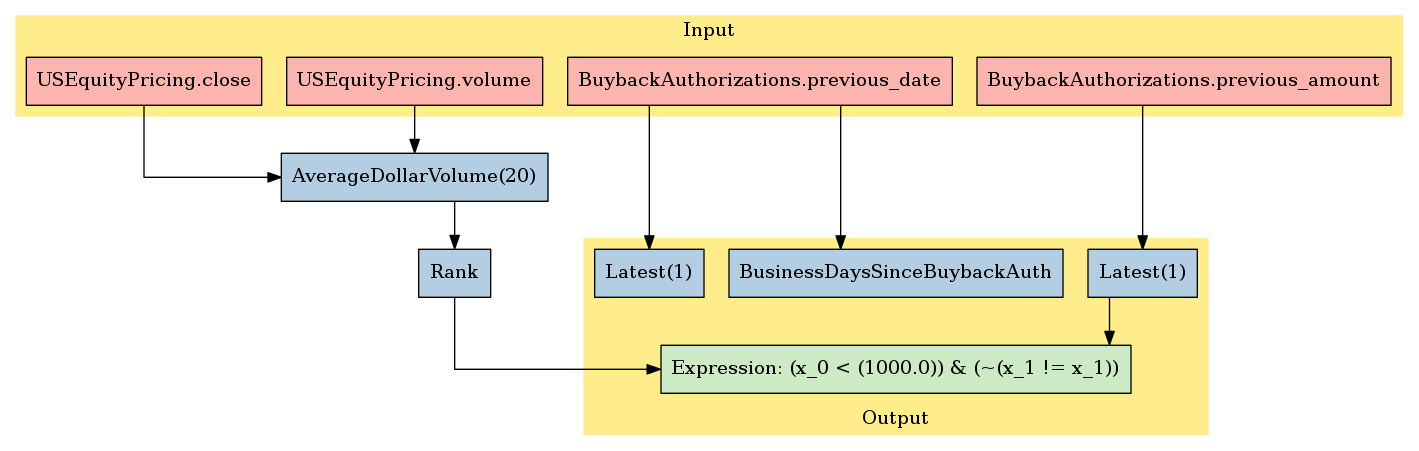

In [5]:
# The show_graph() method of pipeline objects produces a graph to show how it is being calculated.
pipe.show_graph(format='png')

In [6]:
# run_pipeline will show the output of your pipeline
pipe_output = run_pipeline(pipe, start_date='2013-11-01', end_date='2013-11-25')
pipe_output

business_days  \
2013-11-01 00:00:00+00:00 Equity(2 [AA])                 1323   
                          Equity(24 [AAPL])               138   
                          Equity(62 [ABT])                100   
                          Equity(67 [ADSK])               358   
                          Equity(76 [TAP])                588   
                          Equity(114 [ADBE])              406   
                          Equity(122 [ADI])               769   
                          Equity(128 [ADM])              1750   
                          Equity(166 [AES])               177   
                          Equity(168 [AET])                25   
                          Equity(185 [AFL])               843   
                          Equity(197 [AGCO])              331   
                          Equity(239 [AIG])                66   
                          Equity(300 [ALK])               287   
                          Equity(328 [ALTR])               47   
                          Equity(337 [AMAT])              434   
                          Equity(338 [BEAM])               61   
                          Equity(353 [AME])               521   
                          Equity(357 [TWX])               192   
                          Equity(368 [AMGN])              231   
                          Equity(410 [AN])                336   
                          Equity(438 [AON])               401   
                          Equity(448 [APA])               126   
                          Equity(455 [APC])              1354   
                          Equity(460 [APD])               554   
                          Equity(465 [APH])               206   
                          Equity(510 [ARG])               268   
                          Equity(559 [ASH])               122   
                          Equity(607 [ATML])              392   
                          Equity(630 [ADP])               625   
...                                                       ...   
2013-11-25 00:00:00+00:00 Equity(38691 [CFN])              77   
                          Equity(38817 [VRSK])            112   
                          Equity(38921 [LEA])             170   
                          Equity(38936 [DG])              175   
                          Equity(38989 [AOL])             100   
                          Equity(39053 [CIT])             127   
                          Equity(39095 [CHTR])            497   
                          Equity(39546 [LYB])             133   
                          Equity(40430 [GM])              243   
                          Equity(40597 [FLT])             259   
                          Equity(40755 [NLSN])             84   
                          Equity(40852 [KMI])              28   
                          Equity(41047 [HCA])             572   
                          Equity(41149 [QIHU])            490   
                          Equity(41182 [GNC])             202   
                          Equity(41462 [MOS])             527   
                          Equity(41636 [MPC])              42   
                          Equity(41759 [DNKN])            337   
                          Equity(42023 [XYL])              68   
                          Equity(42027 [UBNT])            337   
                          Equity(42118 [GRPN])             78   
                          Equity(42173 [DLPH])            312   
                          Equity(42230 [TRIP])            203   
                          Equity(42277 [ZNGA])            283   
                          Equity(42436 [SLCA])            378   
                          Equity(42699 [VNTV])              0   
                          Equity(42788 [PSX])              83   
                          Equity(43399 [ADT])               3   
                          Equity(43694 [ABBV])            201   
                          Equity(44931 [NWSA])             46   

                 

Taking what we've seen from above, let's see how we'd move that into the backtester.

In [11]:
# This section is only importable in the backtester
from quantopian.algorithm import attach_pipeline, pipeline_output

# General pipeline imports
from quantopian.pipeline import Pipeline
from quantopian.pipeline.factors import AverageDollarVolume

# Import the datasets available
# For use in your algorithms
# Using the full dataset in your pipeline algo
from quantopian.pipeline.data.eventvestor import BuybackAuthorizations
from quantopian.pipeline.factors.eventvestor import BusinessDaysSinceBuybackAuth


def make_pipeline():
    # Create our pipeline
    pipe = Pipeline()
    
    # Screen out penny stocks and low liquidity securities.
    dollar_volume = AverageDollarVolume(window_length=20)
    is_liquid = dollar_volume.rank(ascending=False) < 1000
    
    # Create the mask that we will use for our percentile methods.
    base_universe = (is_liquid)

    # Add pipeline factors
    pipe.add(BuybackAuthorizations.previous_date.latest, 'previous_date')
    pipe.add(BuybackAuthorizations.previous_amount.latest, 'previous_amount')
    pipe.add(BusinessDaysSinceBuybackAuth(), "business_days")

    # Set our pipeline screens
    pipe.set_screen(is_liquid)
    return pipe

def initialize(context):
    attach_pipeline(make_pipeline(), "pipeline")
    
def before_trading_start(context, data):
    results = pipeline_output('pipeline')

Now you can take that and begin to use it as a building block for your algorithms, for more examples on how to do that you can visit our <a href='https://www.quantopian.com/posts/pipeline-factor-library-for-data'>data pipeline factor library</a>